In [20]:
import pandas as pd
import geopandas as gpd
from census import Census
import matplotlib.pyplot as plt

pd.options.display.max_columns =200
c = Census("d95e144b39e17f929287714b0b8ba9768cecdc9f") 

In [44]:
1. im

In [8]:
# import SVI data
svi = gpd.read_file("data/svi/SVI2018_US_tract.geojson")
svi_tribal = gpd.read_file("data/svi/SVI2018_tribal_tract.geojson")
svi_puerto_rico = gpd.read_file("data/svi/SVI2018_PuertoRico_tract.geojson")

In [11]:
## add in puerto rico to USA-wide dataset
svi_pr = svi.append(svi_puerto_rico)

## select just those locations that have values for 'SPL_THEMES' field
svi_pr_forRPL = svi_pr[svi_pr['SPL_THEMES'] != -999].copy()
svi_pr_forRPL_na = svi_pr[svi_pr['SPL_THEMES'] == -999].copy()

## calculate state percentile rank for combined svi variable
svi_pr_forRPL['RPL_ThemesStates'] = svi_pr_forRPL.groupby('STATE')['SPL_THEMES'].rank(pct=True)

## append no data values back to dataset
svi_states = svi_pr_forRPL.append(svi_pr_forRPL_na)

In [26]:
## SET UP
## importing county shapefiles to be able to make regional maps
pr_view = gpd.read_file("data/puerto_rico.geojson")
ak_view = gpd.read_file("data/alaska.geojson")
hi_view = gpd.read_file("data/hawaii.geojson")
lower_view = gpd.read_file("data/lower_48.geojson")

## reprojecting lower 48 to albers usa equal area conic
lower_view = lower_view.to_crs("ESRI:102008")

## reprojecting pr to state plane 6566 
pr_view = pr_view.to_crs('EPSG:6566')

## defining bounding boxes
lower48_xlim = ([lower_view.total_bounds[0],lower_view.total_bounds[2]])
lower48_ylim = ([lower_view.total_bounds[1],lower_view.total_bounds[3]])

#defining bounding box pr
pr_xlim = ([pr_view.total_bounds[0],pr_view.total_bounds[2]])
pr_ylim = ([pr_view.total_bounds[1],pr_view.total_bounds[3]])

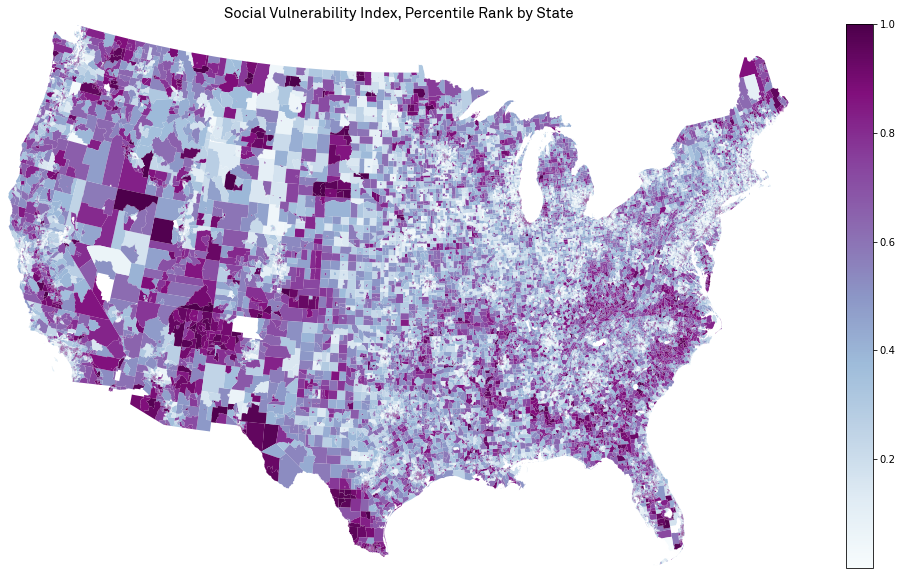

In [55]:
## for plotting -- reprojecting to albers usa
svi_states_albers = svi_states.to_crs("ESRI:102008")

fig, ax = plt.subplots(figsize=(20,10))
svi_states_albers.plot(ax=ax, column='RPL_ThemesStates', legend=True,cmap="BuPu")
ax.set_xlim(lower48_xlim)
ax.set_ylim(lower48_ylim)
ax.set_title("Social Vulnerability Index, Percentile Rank by State", fontname="Akkurat Pro", fontsize=15)
ax.set_axis_off()


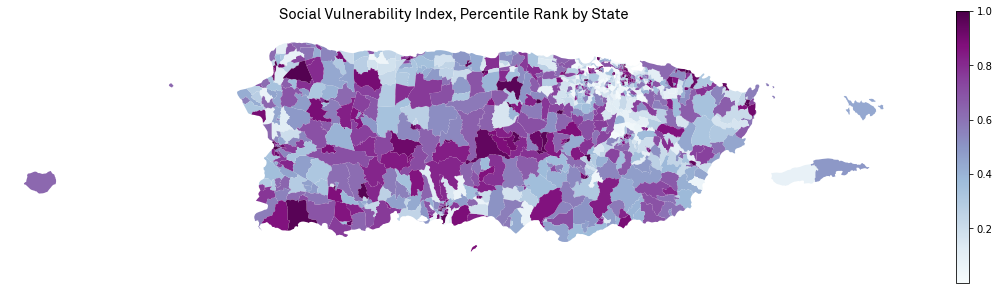

In [56]:
svi_states_pr = svi_states.to_crs('EPSG:6566')

fig, ax = plt.subplots(figsize=(20,5))
svi_states_pr.plot(ax=ax, column='RPL_ThemesStates', legend=True,cmap="BuPu")
ax.set_xlim(pr_xlim)
ax.set_ylim(pr_ylim)
ax.set_title("Social Vulnerability Index, Percentile Rank by State", fontname="Akkurat Pro", fontsize=15)
ax.set_axis_off()
